In [13]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pyarrow as pa

import pandas as pd
DATA_PATH = "historic_bybit/data"

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
from utils import *
from backtester import BackTester
from strategy import basic_lin_regr_model1, monetization_strategy1

In [57]:
strategy_df = basic_lin_regr_model1()
backtest_df = monetization_strategy1(strategy_df)

y_df:  Index(['ALPHAUSDT__future_log_return__1D', 'SUSHIUSDT__future_log_return__1D',
       'ETHUSDT__future_log_return__1D', 'SILLYUSDT__future_log_return__1D',
       'ZENUSDT__future_log_return__1D', 'REQUSDT__future_log_return__1D',
       'WIFUSDT__future_log_return__1D', 'BTCUSDT__future_log_return__1D'],
      dtype='object')
mn_df:  Index(['ALPHAUSDT__future_log_return__1D_MN',
       'SUSHIUSDT__future_log_return__1D_MN',
       'ETHUSDT__future_log_return__1D_MN',
       'SILLYUSDT__future_log_return__1D_MN',
       'ZENUSDT__future_log_return__1D_MN',
       'REQUSDT__future_log_return__1D_MN',
       'WIFUSDT__future_log_return__1D_MN'],
      dtype='object')
MSE: 0.0010
R^2 score: -1.9754
train MSE: 0.0019
train R^2 score: 0.1882


,REQUSDT_price,BTCUSDT_price,REQUSDT_pos
time,,,
2024-02-02 01:00:00,0.08334,42950.0,0.000000
2024-02-02 01:01:00,0.08331,42950.0,0.000000
2024-02-02 01:02:00,0.08331,42959.9,0.000000
2024-02-02 01:03:00,0.08331,42966.0,0.000000
2024-02-02 01:04:00,0.08331,42949.1,0.000000
...,...,...,...
2024-10-15 23:56:00,0.09832,67139.8,0.789557
2024-10-15 23:57:00,0.09826,67105.5,0.695403
2024-10-15 23:58:00,0.09826,67085.3,0.344155


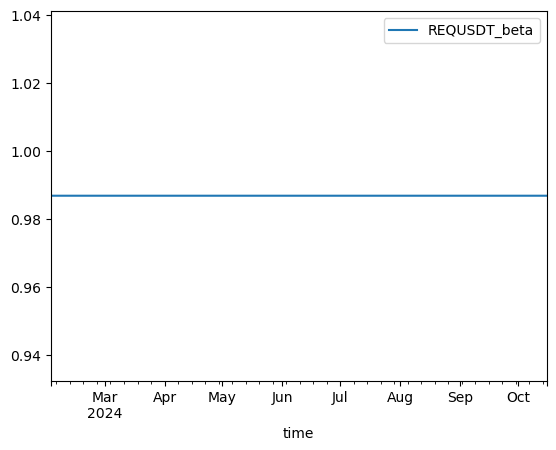

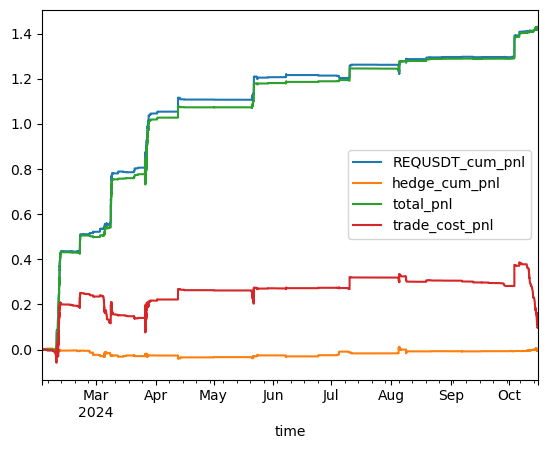

In [35]:
display(backtest_df)
backTester = BackTester(backtest_df)
backTester.plot_individual_pnl()

<Axes: xlabel='time'>

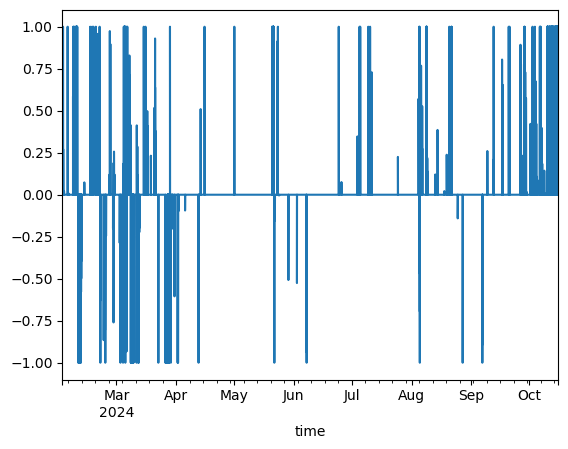

In [7]:
backtest_df['REQUSDT_pos'].plot()

In [6]:
symbols = [
    'ALPHAUSDT',
    'BTCUSDT',
    'SUSHIUSDT',
    'ETHUSDT',
    'SILLYUSDT',
    'ZENUSDT',
    'REQUSDT',
    'WIFUSDT'
]
df = get_combined_data(symbols, DATA_PATH)


# Feature Engineering
add_return_cols_inplace(df, 'open', [5, 60, 1440])

BTC_BETA = get_btc_beta_dict(df, symbols)

# print("\n".join(df.columns))
features = df

y_df = get_future_return_cols(df, 'open', [1440])
mn_df = get_MN_cols(y_df, BTC_BETA)

# display(mn_df)

# display(df.info())
print(mn_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 371461 entries, 2024-02-01 01:00:00 to 2024-10-16 00:00:00
Data columns (total 7 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ALPHAUSDT_future_return_1440_MN  370021 non-null  float64
 1   SUSHIUSDT_future_return_1440_MN  370021 non-null  float64
 2   ETHUSDT_future_return_1440_MN    370021 non-null  float64
 3   SILLYUSDT_future_return_1440_MN  370021 non-null  float64
 4   ZENUSDT_future_return_1440_MN    370021 non-null  float64
 5   REQUSDT_future_return_1440_MN    370021 non-null  float64
 6   WIFUSDT_future_return_1440_MN    370021 non-null  float64
dtypes: float64(7)
memory usage: 22.7 MB
None


In [146]:
y_col='REQUSDT_future_return_1440_MN'

model, backtest_df, info = get_LR_model(features, mn_df, y_col)

MSE: 0.0010
R^2 score: -1.9276
train MSE: 0.0019
train R^2 score: 0.1888


In [140]:
print('\n'.join(features.columns))

ALPHAUSDT_open
ALPHAUSDT_high
ALPHAUSDT_low
ALPHAUSDT_close
ALPHAUSDT_volume
ALPHAUSDT_turnover
BTCUSDT_open
BTCUSDT_high
BTCUSDT_low
BTCUSDT_close
BTCUSDT_volume
BTCUSDT_turnover
SUSHIUSDT_open
SUSHIUSDT_high
SUSHIUSDT_low
SUSHIUSDT_close
SUSHIUSDT_volume
SUSHIUSDT_turnover
ETHUSDT_open
ETHUSDT_high
ETHUSDT_low
ETHUSDT_close
ETHUSDT_volume
ETHUSDT_turnover
SILLYUSDT_open
SILLYUSDT_high
SILLYUSDT_low
SILLYUSDT_close
SILLYUSDT_volume
SILLYUSDT_turnover
ZENUSDT_open
ZENUSDT_high
ZENUSDT_low
ZENUSDT_close
ZENUSDT_volume
ZENUSDT_turnover
REQUSDT_open
REQUSDT_high
REQUSDT_low
REQUSDT_close
REQUSDT_volume
REQUSDT_turnover
WIFUSDT_open
WIFUSDT_high
WIFUSDT_low
WIFUSDT_close
WIFUSDT_volume
WIFUSDT_turnover
ALPHAUSDT_return_5
ALPHAUSDT_return_60
ALPHAUSDT_return_1440
BTCUSDT_return_5
BTCUSDT_return_60
BTCUSDT_return_1440
SUSHIUSDT_return_5
SUSHIUSDT_return_60
SUSHIUSDT_return_1440
ETHUSDT_return_5
ETHUSDT_return_60
ETHUSDT_return_1440
SILLYUSDT_return_5
SILLYUSDT_return_60
SILLYUSDT_return_1440

In [ ]:
model

,REQUSDT_future_return_1440_MN,PRED_REQUSDT_future_return_1440_MN
count,73717.000000,73717.000000
mean,-0.003609,0.010977
std,0.018701,0.021481
min,-0.183763,-0.082191
25%,-0.013364,-0.003364
50%,-0.002300,0.006295
75%,0.008010,0.024385
max,0.175677,0.269686


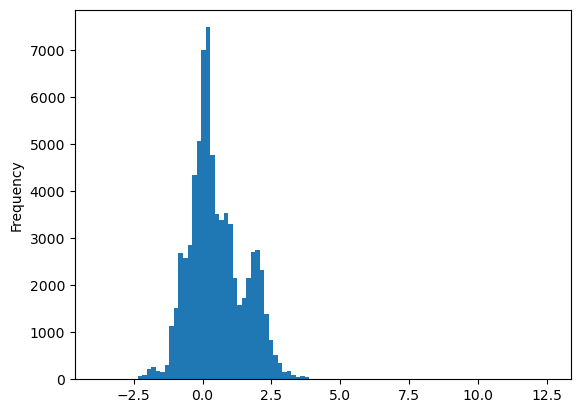

In [126]:
# backtest_df[['REQUSDT_future_return_1440_MN','PRED_REQUSDT_future_return_1440_MN']].plot()
backtest_df['signal'] = backtest_df['PRED_REQUSDT_future_return_1440_MN'] / std
(backtest_df['PRED_REQUSDT_future_return_1440_MN'] / 0.021481).plot(kind='hist', bins=100)
backtest_df[['REQUSDT_future_return_1440_MN','PRED_REQUSDT_future_return_1440_MN']].describe()

/Users/giovanni/Development/GT Quant/research/gio/backtester.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_df_cleaned['ideal_pos'] = backtest_df_cleaned[signal_col].map(pos_mapping_func)
/Users/giovanni/Development/GT Quant/research/gio/backtester.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['main_pos'] = df['ideal_pos'] * (1.0 / df[price_col]) * (1.0 / (1+beta))
/Users/giovanni/Development/GT Quant/research/gio/backtester.py:16: SettingWithCopyWarning: 
A value is trying to be se

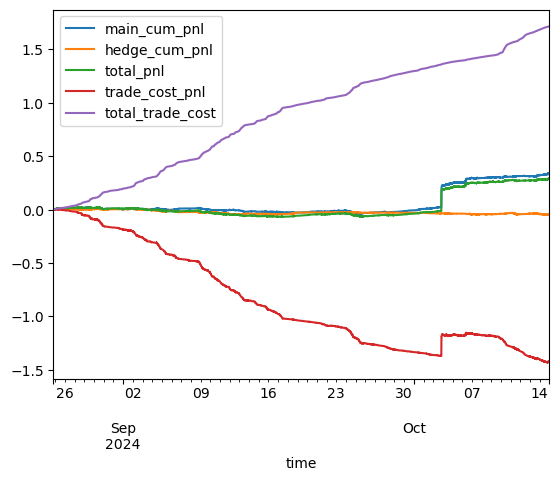

In [161]:
def get_mapping_func(low_bound, high_bound):
    def get_ideal_pos(signal):
        if abs(signal) < low_bound:
            return 0.0
        elif abs(signal) > high_bound:
            return np.sign(signal)
        
        return (signal - np.sign(signal) * low_bound) / (high_bound - low_bound)
    return get_ideal_pos

def map1(signal):
    low_bound, high_bound = 1.0, 3.0

    if abs(signal) < 0.0030:
        return 0.0
    # return np.sign(signal)

    return (signal - np.sign(signal) * low_bound) / (high_bound - low_bound)
    # signal  info.train_pred_return_std

mapping_func = get_mapping_func(2.5, 3.5)

# prediction_column = 'PRED_REQUSDT_future_return_1440_MN'
beta = BTC_BETA['REQUSDT']
backtest(backtest_df, 'REQUSDT_open', 'BTCUSDT_open', map1, beta, signal_col='signal')

<Axes: xlabel='time'>

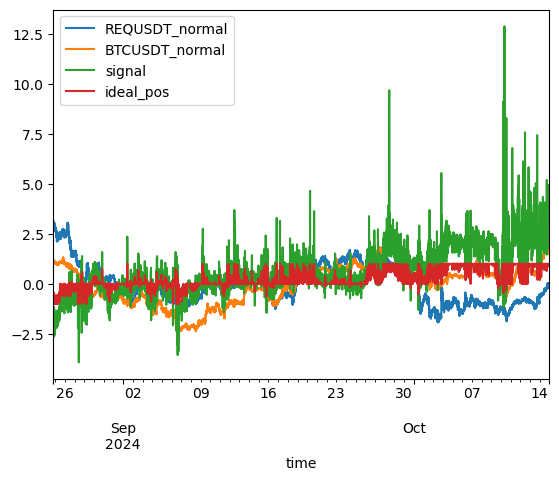

In [107]:
plot_df = pd.DataFrame()

plot_df['REQUSDT_normal'] = (backtest_df_cleaned['REQUSDT_open'] - backtest_df_cleaned['REQUSDT_open'].mean()) / backtest_df_cleaned['REQUSDT_open'].std()
plot_df['BTCUSDT_normal'] = (backtest_df_cleaned['BTCUSDT_open'] - backtest_df_cleaned['BTCUSDT_open'].mean()) / backtest_df_cleaned['BTCUSDT_open'].std()
plot_df['BTCUSDT_normal']
plot_df['signal'] = backtest_df_cleaned['signal']
plot_df['ideal_pos'] = backtest_df_cleaned['ideal_pos']


plot_df.plot()

<Axes: xlabel='time'>

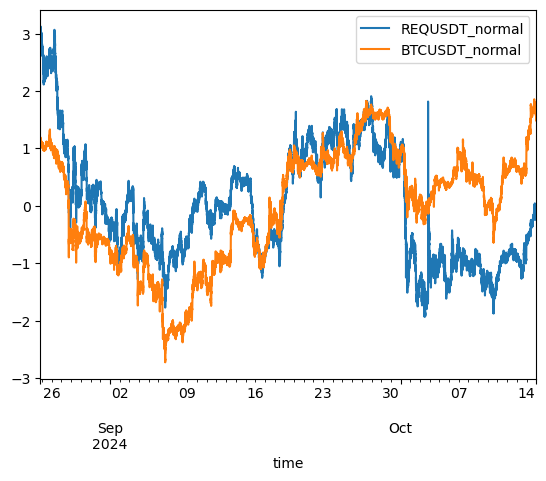

In [110]:
plot_df[['REQUSDT_normal', 'BTCUSDT_normal']].plot()

In [98]:
backtest_df_cleaned.describe()

,REQUSDT_open,BTCUSDT_open,signal,ideal_pos
count,73717.000000,73717.000000,73717.000000,73717.000000
mean,0.101634,60847.005316,0.525401,0.215382
std,0.005463,3032.950595,1.028153,0.420290
min,0.091070,52579.400000,-3.934005,-1.000000
25%,0.096970,58550.100000,-0.161035,0.000000
50%,0.100960,61225.000000,0.301286,0.000000
75%,0.106200,63183.200000,1.167175,0.444783
max,0.118720,66478.200000,12.908299,1.000000


<Axes: xlabel='time'>

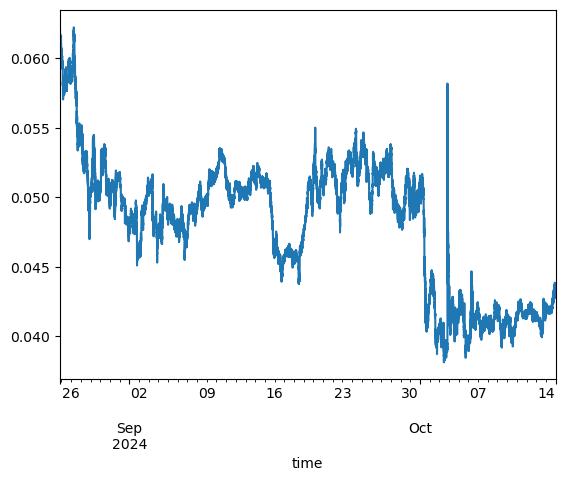

In [104]:
beta
df = backtest_df_cleaned.copy()
df['mn'] = df['REQUSDT_open'] - df['BTCUSDT_open'] * beta
df['mn'].plot()


